In [1]:
import os
%load_ext rpy2.ipython


In [2]:
%%R
workDir = '/home/chantal/Chazy/Bulk/515_806/data/'
figDir = '/home/chantal/Chazy/Bulk/515_806/figs/'

physeqDir = '/home/chantal/Chazy/data/phyloseq/'
physeqBulk = 'bulk-core'

nprocs = 20

In [3]:
%%R
library(biom)
library(phyloseq)
library(metagenomeSeq)
library(plyr);library(dplyr)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(doParallel)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: Biobase

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: BiocGenerics

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: parallel

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘BiocGenerics’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, 

In [4]:
%%R

F = file.path(physeqDir, physeqBulk)

physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.Bulk = prune_samples((physeq.Bulk.m$Land_Management != "PAS"),
                           physeq.Bulk)
physeq.Bulk = physeq.Bulk %>% filter_taxa(function(x) sum(x) > 0, TRUE) 
physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk.Sparsity

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4930 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 25 sample variables ]
tax_table()   Taxonomy Table:    [ 4930 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4930 tips and 4929 internal nodes ]


In [5]:
%%R
physeq.Bulk.r = rarefy_even_depth(physeq.Bulk.Sparsity, sample.size = 9500, rngseed = 23435, replace = TRUE,
                          trimOTUs = TRUE, verbose = TRUE)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: `set.seed(23435)` was used to initialize repeatable random subsampling.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Please record this for your records so others can reproduce.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Try `set.seed(23435); .Random.seed` for the full vector

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: ...

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 11 samples removedbecause they contained fewer reads than `sample.size`.

  res = super(Function, self).__call__

In [6]:
%%R
physeq.Bulk.m = physeq.Bulk.r %>% sample_data

In [7]:
%%R
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'July' & physeq.Bulk.m$Year == 2014] = 0
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'September' & physeq.Bulk.m$Year == 2014] = 2
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'October' & physeq.Bulk.m$Year == 2014] = 3
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'November' & physeq.Bulk.m$Year == 2014] = 4
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'April' & physeq.Bulk.m$Year == 2015] = 9
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'June' & physeq.Bulk.m$Year == 2015] = 11
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'July' & physeq.Bulk.m$Year == 2015] = 12
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'August' & physeq.Bulk.m$Year == 2015] = 13
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'September' & physeq.Bulk.m$Year == 2015] = 14
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'October' & physeq.Bulk.m$Year == 2015] = 15
physeq.Bulk.m$RelTime[physeq.Bulk.m$Month == 'November' & physeq.Bulk.m$Year == 2015] = 16

physeq.Bulk.m %>% tail()

Sample Data:        [6 samples by 26 sample variables]:
                      Full.sample Fraction PrimerF PrimerR Barcode Rev.index
Nov.NTH.1.2015     Nov.NTH.1.2015       NA    515f    806r      67  actacgac
April.NTR.3.2015 April.NTR.3.2015       NA    515f    806r      94  tatagcga
Oct.NTR.1.2015     Oct.NTR.1.2015       NA    515f    806r      46  ctgcgtag
O.NTR.1                   O.NTR.1       NA    515f    806r     160  cgagcgac
Nov.NTH.2.2015     Nov.NTH.2.2015       NA    515f    806r      72  actacgac
N.PTR.4                   N.PTR.4       NA    515f    806r     190  tatagcga
                 Fwd.index Treatment Day Replicate Pool Land_Management
Nov.NTH.1.2015    tagcgagt      <NA>  NA         1    8             NTH
April.NTR.3.2015  cgtgagtg      <NA>  NA        NA    8             NTR
Oct.NTR.1.2015    cgtgagtg      <NA>  NA         1    8             NTR
O.NTR.1           gtcagata      <NA>  NA         1    5             NTR
Nov.NTH.2.2015    gacaccgt      <NA>  NA     

In [8]:
%%R
physeq.final = merge_phyloseq(physeq.Bulk.r, physeq.Bulk.m)
physeq.final

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4930 taxa and 165 samples ]
sample_data() Sample Data:       [ 165 samples by 26 sample variables ]
tax_table()   Taxonomy Table:    [ 4930 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4930 tips and 4929 internal nodes ]


In [9]:
%%R
ph.m = physeq.final %>% sample_data

head(ph.m)

Sample Data:        [6 samples by 26 sample variables]:
                Full.sample Fraction PrimerF PrimerR Barcode Rev.index
July15.NTR.2   July15.NTR.2       NA    515f    806r     104  cgagagtt
July15.NTH.4   July15.NTH.4       NA    515f    806r     110  gacatagt
June15.PTH.4   June15.PTH.4       NA    515f    806r      92  tatagcga
April15.NTR.1 April15.NTR.1       NA    515f    806r      65  actacgac
July15.NTR.3   July15.NTR.3       NA    515f    806r     108  gacatagt
July15.PTR.1   July15.PTR.1       NA    515f    806r      99  cgagagtt
              Fwd.index Treatment Day Replicate Pool Land_Management Gradient
July15.NTR.2   gtcagata      <NA>  NA         2    4             NTR     <NA>
July15.NTH.4   tcgacgag      <NA>  NA         4    4             NTH     <NA>
June15.PTH.4   ctgcgtgt      <NA>  NA         4    4             PTH     <NA>
April15.NTR.1  atcgtacg      <NA>  NA         1    4             NTR     <NA>
July15.NTR.3   tacgagac      <NA>  NA         3    4     

In [10]:
%%R
make_metagenomeSeq = function(physeq) {
    require("metagenomeSeq")
    require("phyloseq")
    # Enforce orientation
    if (!taxa_are_rows(physeq)) {
        physeq <- t(physeq)
    }
    OTU = as(otu_table(physeq), "matrix")
    # Convert sample_data to AnnotatedDataFrame
    ADF = AnnotatedDataFrame(data.frame(sample_data(physeq)))
    # define dummy 'feature' data for OTUs, using their name Helps with
    # extraction and relating to taxonomy later on.
    TDF = AnnotatedDataFrame(data.frame(tax_table(physeq)))
    # Create the metagenomeSeq object
    MGS = newMRexperiment(counts = OTU, phenoData = ADF, featureData = TDF)
    # Trigger metagenomeSeq to calculate its Cumulative Sum scaling factor.
    MGS = cumNorm(MGS)
    return(MGS)
}

MR = make_metagenomeSeq(physeq.final)

In [11]:
%%R
res = fitTimeSeries(obj = MR, lvl = 'Rank3', feature = '__Spartobacteria', class = "OM",
                    id = "Full.sample", time = "RelTime")

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required namespace: gss

  res = super(Function, self).__call__(*new_args, **new_kwargs)


[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000


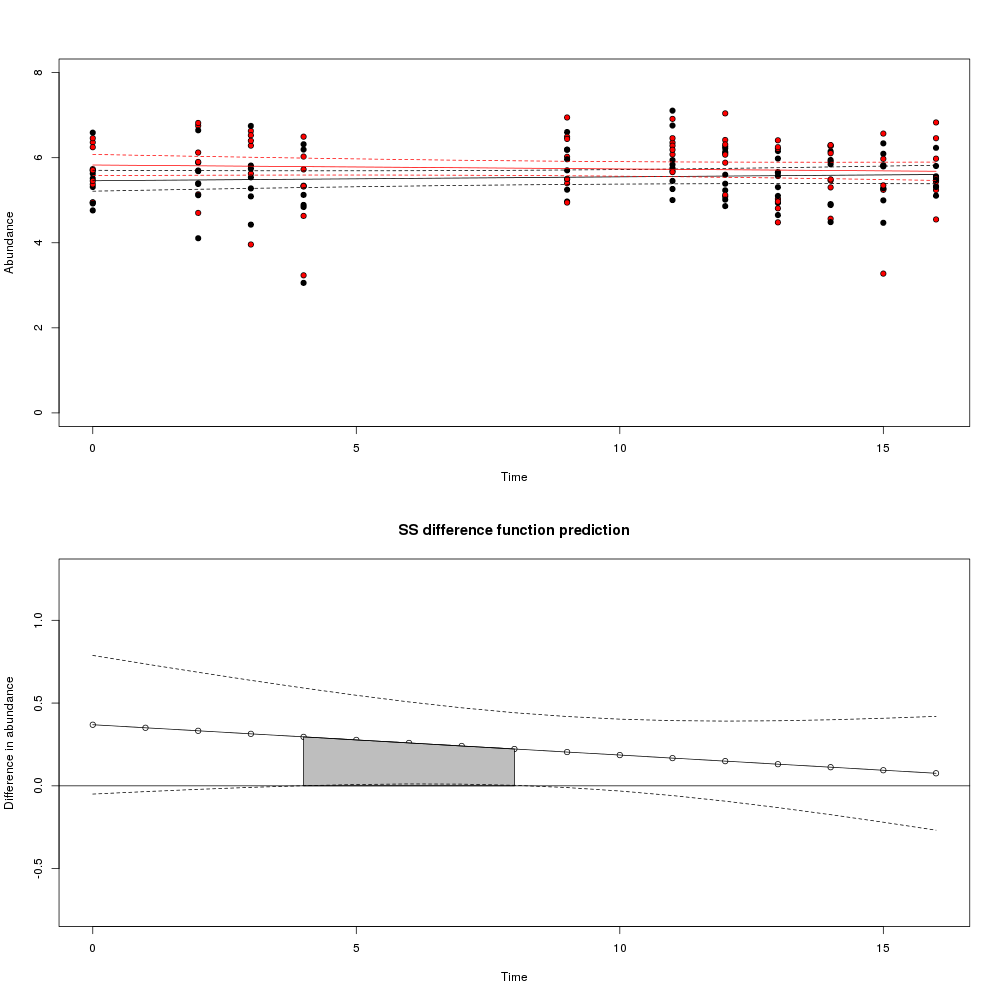

In [12]:
%%R -h 1000 -w 1000
par(mfrow = c(2, 1))
plotClassTimeSeries(res, pch = 21, bg = res$data$class, ylim = c(0,
8))
plotTimeSeries(res)

In [14]:
%%R
TimeSeries = function(MR, feature) {  
    
    res = fitTimeSeries(obj = MR, lvl = 'Rank3', feature = feature, class = "OM",
                    id = "Full.sample", time = "RelTime")

    return(res)
}




In [16]:
%%R
tax =  as.data.frame(tax_table(physeq.final))
tax2 = filter(tax, !(is.na(Rank3)))
feature = (unique(tax2$Rank3))
str(feature)

 Factor w/ 111 levels "__11-24","__32-21",..: 14 73 66 75 76 74 109 106 65 34 ...


In [18]:
%%R
registerDoParallel(8)

TS = llply(feature, 
          TimeSeries,
          .parallel = TRUE,
          MR = MR)

[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 400
[1] 500
[1] 600
[1] 700
[1] 800
[1] 900
[1] 1000
[1] 100
[1] 200
[1] 300
[1] 

In [19]:
%%R
Make_DF = function(TS) {  
    
    d = data.frame(TS$data[, c("abundance","class", "time", "id")])
    d$Sample = rownames(TS$data)


    return(d)
}

In [21]:
%%R
l = list()
for (i in 1:length(feature)) {
    classname = as.vector(feature[i])
    l[[classname]] = Make_DF(TS[[i]])
    
}

In [22]:
%%R
DF = do.call(rbind, l)

In [23]:
%%R
DF$Class_Sample = rownames(DF)

In [51]:
%%R
head(DF)

                       abundance class time            id        Sample
__BD7-11.July15.NTR.2  0.0000000     R   12  July15.NTR.2  July15.NTR.2
__BD7-11.July15.NTH.4  0.6215272     H   12  July15.NTH.4  July15.NTH.4
__BD7-11.June15.PTH.4  0.6969891     H   11  June15.PTH.4  June15.PTH.4
__BD7-11.April15.NTR.1 0.6865091     R    9 April15.NTR.1 April15.NTR.1
__BD7-11.July15.NTR.3  0.6559977     R   12  July15.NTR.3  July15.NTR.3
__BD7-11.July15.PTR.1  0.0000000     R   12  July15.PTR.1  July15.PTR.1
                                 Class_Sample
__BD7-11.July15.NTR.2   __BD7-11.July15.NTR.2
__BD7-11.July15.NTH.4   __BD7-11.July15.NTH.4
__BD7-11.June15.PTH.4   __BD7-11.June15.PTH.4
__BD7-11.April15.NTR.1 __BD7-11.April15.NTR.1
__BD7-11.July15.NTR.3   __BD7-11.July15.NTR.3
__BD7-11.July15.PTR.1   __BD7-11.July15.PTR.1


In [25]:
%%R
DF2 = separate(DF, Class_Sample, c("C", "Full.sample"), sep = '\\.' )
head(DF2)


                       abundance class time            id        Sample
__BD7-11.July15.NTR.2  0.0000000     R   12  July15.NTR.2  July15.NTR.2
__BD7-11.July15.NTH.4  0.6215272     H   12  July15.NTH.4  July15.NTH.4
__BD7-11.June15.PTH.4  0.6969891     H   11  June15.PTH.4  June15.PTH.4
__BD7-11.April15.NTR.1 0.6865091     R    9 April15.NTR.1 April15.NTR.1
__BD7-11.July15.NTR.3  0.6559977     R   12  July15.NTR.3  July15.NTR.3
__BD7-11.July15.PTR.1  0.0000000     R   12  July15.PTR.1  July15.PTR.1
                              C Full.sample
__BD7-11.July15.NTR.2  __BD7-11      July15
__BD7-11.July15.NTH.4  __BD7-11      July15
__BD7-11.June15.PTH.4  __BD7-11      June15
__BD7-11.April15.NTR.1 __BD7-11     April15
__BD7-11.July15.NTR.3  __BD7-11      July15
__BD7-11.July15.PTR.1  __BD7-11      July15


In [26]:
%%R
Make_DF2 = function(TS) {  
    
    d = data.frame(TS$timeIntervals)


    return(d)
}

In [27]:
%%R
l.pval = list()
for (i in 1:length(feature)) {
    classname = as.character(feature[i])
    l.pval[[classname]] = Make_DF2(TS[[i]])
    
}

In [28]:
%%R
l.pval2 = list()


for (i in 1:length(l.pval)) {
        if (length(l.pval[[i]]) == 1) {
        l.pval2[[i]] = l.pval[[i]]
        l.pval2[[i]]$Interval.start = NA
        l.pval2[[i]]$Interval.end = NA
        l.pval2[[i]]$Area = NA
        l.pval2[[i]]$p.value = NA
        l.pval2[[i]]$TS.timeIntervals = NULL
    } else {
            l.pval2[[i]] = l.pval[[i]]
        } 
    
}

In [29]:
%%R

l.pval3 = list()
for (i in 1:length(feature)) {
    classname = as.character(feature[i])
    l.pval3[[classname]] = l.pval2[[i]]
    
}

In [30]:
%%R
DF3 = do.call(rbind, l.pval3)

In [31]:
%%R
DF3$C = rownames(DF3)
head(DF3)


                   Interval.start Interval.end      Area p.value
__BD7-11                       NA           NA        NA      NA
__Phycisphaerae                 4           10  2.600924   0.038
__OM190                         5           15 -2.107124   0.005
__Pla4_lineage                 NA           NA        NA      NA
__Planctomycetacia             NA           NA        NA      NA
__Pla3_lineage                 NA           NA        NA      NA
                                    C
__BD7-11                     __BD7-11
__Phycisphaerae       __Phycisphaerae
__OM190                       __OM190
__Pla4_lineage         __Pla4_lineage
__Planctomycetacia __Planctomycetacia
__Pla3_lineage         __Pla3_lineage


In [32]:
%%R
head(DF2)
df.total = left_join(DF2, DF3)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Joining by: "C"

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [40]:
%%R
Make_DF3 = function(TS) {  
    
    d = data.frame(TS$fit[, c("fit","se", "timePoints")])
    d$Sample = rownames(TS$fit)


    return(d)
}

In [41]:
%%R

l2 = list()
for (i in 1:length(feature)) {
    classname = as.vector(feature[i])
    l2[[classname]] = Make_DF3(TS[[i]])
    
}

In [42]:
%%R
fit = do.call(rbind, l2)

In [43]:
%%R
fit$C = rownames(fit)
fit$time = fit$timePoints
fit$timePoints = NULL
fit2 = separate(fit, C, "Class", sep = '\\.')
fit2$C = fit2$Class
fit2$Class = NULL
head(fit2)

                    fit        se Sample time        C
__BD7-11.1  0.002171739 0.2123152      1    0 __BD7-11
__BD7-11.2 -0.014550434 0.1954775      2    1 __BD7-11
__BD7-11.3 -0.031272605 0.1792718      3    2 __BD7-11
__BD7-11.4 -0.047994773 0.1638858      4    3 __BD7-11
__BD7-11.5 -0.064716936 0.1495727      5    4 __BD7-11
__BD7-11.6 -0.081439092 0.1366698      6    5 __BD7-11


In [44]:
%%R
df.all = left_join(df.total, fit2, by = c('time', 'C'))

In [45]:
%%R
df.sig = filter(df.all, p.value <=0.01)

In [46]:
%%R
length(unique(df.sig$C))

[1] 32


In [52]:
%%R
write.csv(df.sig, file = "data/OM_TS.csv",row.names=FALSE)

In [4]:
%%R
df.sig = read.csv('data/OM_TS.csv')

In [5]:
%%R
head(df.sig)

  abundance class time            id      Sample.x       C Full.sample
1  4.322461     R   12  July15.NTR.2  July15.NTR.2 __OM190      July15
2  4.271209     H   12  July15.NTH.4  July15.NTH.4 __OM190      July15
3  3.991575     H   11  June15.PTH.4  June15.PTH.4 __OM190      June15
4  4.269148     R    9 April15.NTR.1 April15.NTR.1 __OM190     April15
5  4.236252     R   12  July15.NTR.3  July15.NTR.3 __OM190      July15
6  3.836672     R   12  July15.PTR.1  July15.PTR.1 __OM190      July15
  Interval.start Interval.end      Area p.value        fit         se Sample.y
1              5           15 -2.107124   0.005 -0.2156038 0.08600561       13
2              5           15 -2.107124   0.005 -0.2156038 0.08600561       13
3              5           15 -2.107124   0.005 -0.2131581 0.08051257       12
4              5           15 -2.107124   0.005 -0.2082668 0.07631254       10
5              5           15 -2.107124   0.005 -0.2156038 0.08600561       13
6              5           15

In [54]:
%%R
df.sig$T[df.sig$time == 0] = '2014-7-10'
df.sig$T[df.sig$time == 2] = '2014-9-24'
df.sig$T[df.sig$time == 3] = '2014-10-29'
df.sig$T[df.sig$time == 4] = '2014-11-26'
df.sig$T[df.sig$time == 9] = '2015-4-30'
df.sig$T[df.sig$time == 11] = '2015-6-17'
df.sig$T[df.sig$time == 12] = '2015-7-16'
df.sig$T[df.sig$time == 13] = '2015-8-13'
df.sig$T[df.sig$time == 14] = '2015-9-23'
df.sig$T[df.sig$time == 15] = '2015-10-27'
df.sig$T[df.sig$time == 16] = '2015-11-25'

df.sig$T = as.POSIXct(strptime(df.sig$T, format = "%Y-%m-%d"))

In [55]:
%%R
head(df.sig)

  abundance class time            id      Sample.x       C Full.sample
1  4.322461     R   12  July15.NTR.2  July15.NTR.2 __OM190      July15
2  4.271209     H   12  July15.NTH.4  July15.NTH.4 __OM190      July15
3  3.991575     H   11  June15.PTH.4  June15.PTH.4 __OM190      June15
4  4.269148     R    9 April15.NTR.1 April15.NTR.1 __OM190     April15
5  4.236252     R   12  July15.NTR.3  July15.NTR.3 __OM190      July15
6  3.836672     R   12  July15.PTR.1  July15.PTR.1 __OM190      July15
  Interval.start Interval.end      Area p.value        fit         se Sample.y
1              5           15 -2.107124   0.005 -0.2156038 0.08600561       13
2              5           15 -2.107124   0.005 -0.2156038 0.08600561       13
3              5           15 -2.107124   0.005 -0.2131581 0.08051257       12
4              5           15 -2.107124   0.005 -0.2082668 0.07631254       10
5              5           15 -2.107124   0.005 -0.2156038 0.08600561       13
6              5           15

In [211]:
%%R
plotClassTimeSeries.df <-function(df, formula, v, xlab="Time",ylab="Abundance",color0="black",
                            color1="red",include=c("1","class", "time:class"),...){
    if(missing(formula)){
        mod = gss::ssanova(abundance ~ time * class, data=df)
    } else{
        mod = gss::ssanova(formula,data=df)
    }
    
    timePoints = seq(min(df$time),max(df$time),by=1)
    group0 = data.frame(time=timePoints,class=levels(df$class)[1])
    group1 = data.frame(time=timePoints,class=levels(df$class)[2])
    pred0  = predict(mod, newdata=group0,include=include, se=TRUE)
    pred1  = predict(mod, newdata=group1,include=include, se=TRUE)
    
    
    plot(x=df$time,y=df$abundance,xlab=xlab,ylab=ylab,...)
    lines(x=group0$time,y=pred0$fit,col=color0)
    lines(x=group0$time,y=pred0$fit+(1.96*pred0$se),lty=2,col=color0)
    lines(x=group0$time,y=pred0$fit-(1.96*pred0$se),lty=2,col=color0)

    lines(x=group1$time,y=pred1$fit,col=color1)
    lines(x=group1$time,y=pred1$fit+(1.96*pred1$se),lty=2,col=color1)
    lines(x=group1$time,y=pred1$fit-(1.96*pred1$se),lty=2,col=color1)
    
    title(main = v)
    
   #text(bquote(paste(.(unique(df$p.value)))))
}

In [202]:
%%R
unique(dftest$p.value)

[1] 0.005


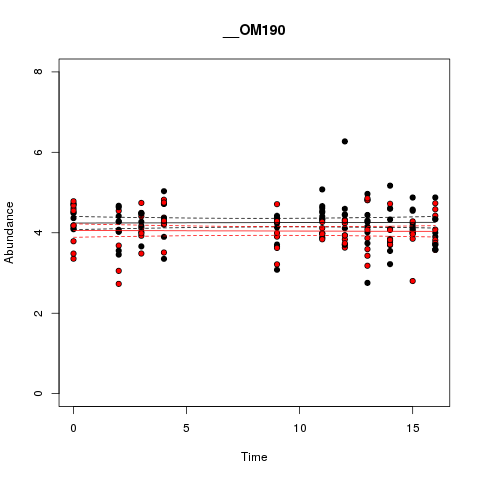

In [212]:
%%R

dftest = filter(df.sig, C == "__OM190")
plotClassTimeSeries.df(dftest, pch = 21, v= "__OM190",  bg = dftest$class, ylim = c(0,
8))

In [125]:
%%R
clist = as.list(unique(df.sig$C))
testclist = head(clist, n = 5)

In [126]:
%%R
testclist

[[1]]
[1] "__OM190"

[[2]]
[1] "__vadinHA49"

[[3]]
[1] "__DA052"

[[4]]
[1] "__KF-JG30-18"

[[5]]
[1] "__OPB35_soil_group"



In [132]:
%%R
lc = list()
for (v in testclist){
        d = filter(df.sig, C == v)
        lc[[v]] = d
    }


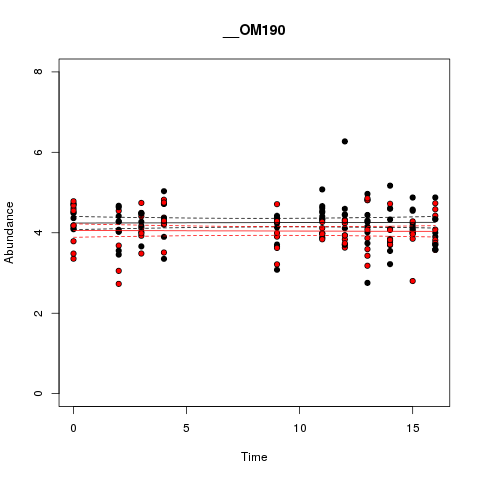

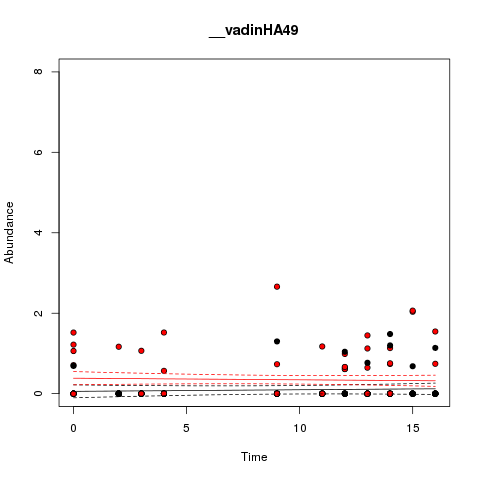

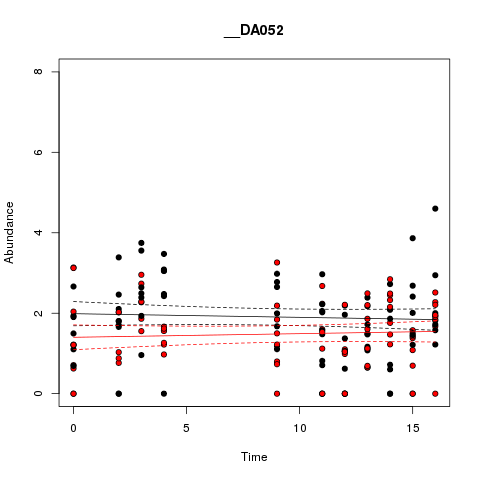

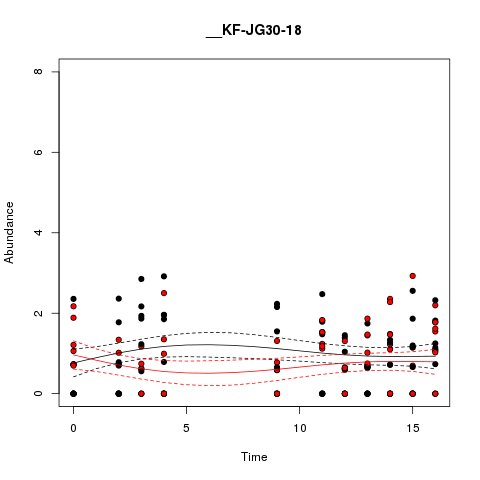

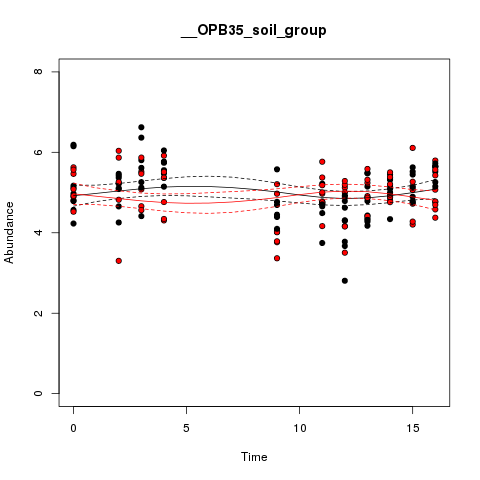

In [213]:
%%R
plots.l = list()
for (v in testclist){
    plots.l[[v]] = plotClassTimeSeries.df(lc[[v]], v=v , pch = 21, bg = dftest$class, ylim = c(0,
8))
    }



In [140]:
%%R -h 2000 -w 500

do.call("grid.arrange", c(plots.l))#, nrow=length(names(plots.l))))


Error in unit(rep(1, nrow), "null") : 
  'x' and 'units' must have length > 0


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in unit(rep(1, nrow), "null") : 
  'x' and 'units' must have length > 0

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [174]:
%%R
head(df.sig)

  abundance class time            id      Sample.x       C Full.sample
1  4.322461     R   12  July15.NTR.2  July15.NTR.2 __OM190      July15
2  4.271209     H   12  July15.NTH.4  July15.NTH.4 __OM190      July15
3  3.991575     H   11  June15.PTH.4  June15.PTH.4 __OM190      June15
4  4.269148     R    9 April15.NTR.1 April15.NTR.1 __OM190     April15
5  4.236252     R   12  July15.NTR.3  July15.NTR.3 __OM190      July15
6  3.836672     R   12  July15.PTR.1  July15.PTR.1 __OM190      July15
  Interval.start Interval.end      Area p.value        fit         se Sample.y
1              5           15 -2.107124   0.005 -0.2156038 0.08600561       13
2              5           15 -2.107124   0.005 -0.2156038 0.08600561       13
3              5           15 -2.107124   0.005 -0.2131581 0.08051257       12
4              5           15 -2.107124   0.005 -0.2082668 0.07631254       10
5              5           15 -2.107124   0.005 -0.2156038 0.08600561       13
6              5           15

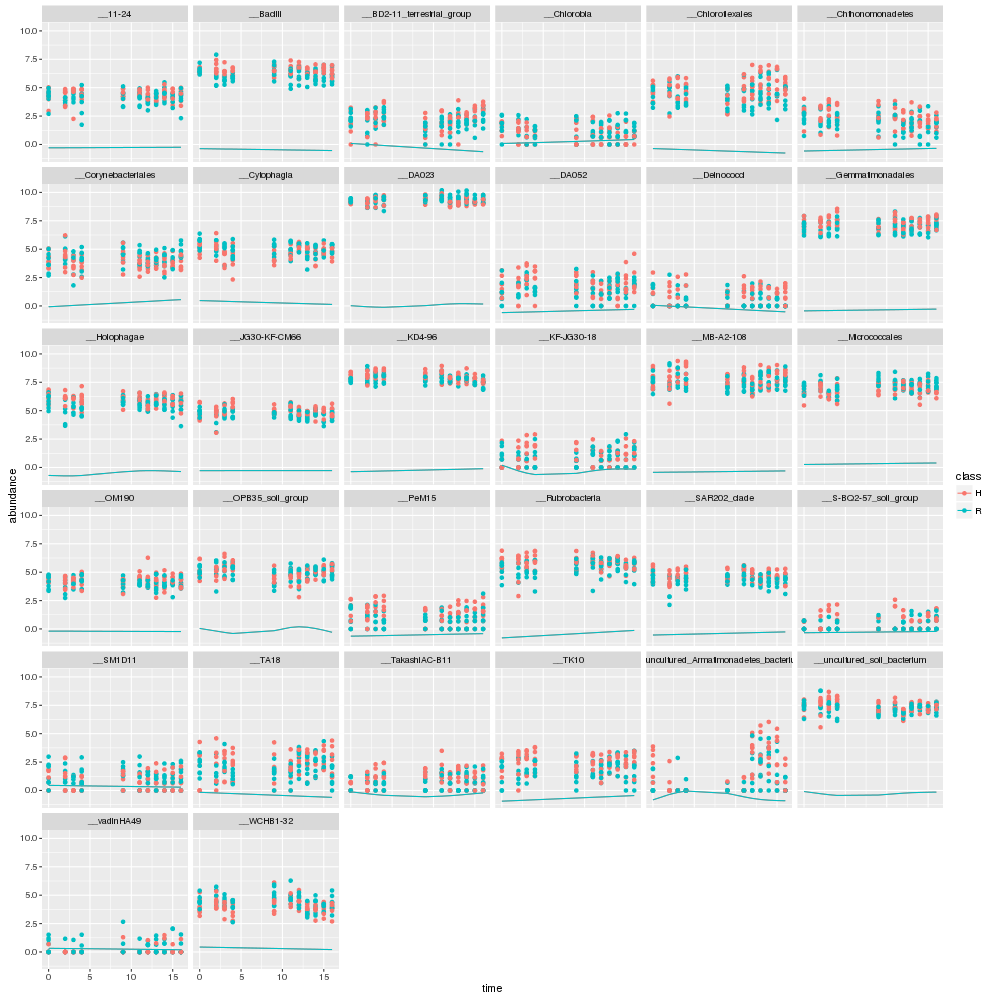

In [180]:
%%R -h 1000 -w 1000
head(df.sig)

ggplot(df.sig, aes(x = time, y = abundance, color = class)) + 
geom_point() + 
geom_line(aes(x = time, y = fit, color = class, group = class)) +
facet_wrap(~C)

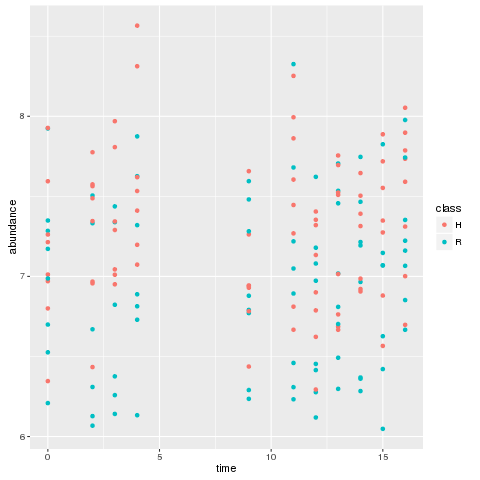

In [38]:
%%R
t = filter(df.sig, C == '__Gemmatimonadales')
ggplot(t, aes(x = time, y = abundance, color = class)) +
geom_point() 


In [148]:
%%R
head(df.sig)
df.pos = filter(df.sig, fit > 0)
df.neg = filter(df.sig, fit < 0)

In [50]:
%%R
sessionInfo()

R version 3.2.3 (2015-12-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu precise (12.04.5 LTS)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggplot2_2.0.0         tidyr_0.4.1           dplyr_0.4.3          
 [4] plyr_1.8.3            metagenomeSeq_1.11.10 RColorBrewer_1.1-2   
 [7] glmnet_2.0-3          foreach_1.4.3         Matrix_1.2-3         
[10] limma_3.22.7          Biobase_2.26.0        BiocGenerics_0.12.1  
[13] phyloseq_1.10.0       biom_0.3.12          

loaded via a namespace (and not attached):